In [1]:
from matplotlib import pyplot as plt
import numpy as np
import utils
import random

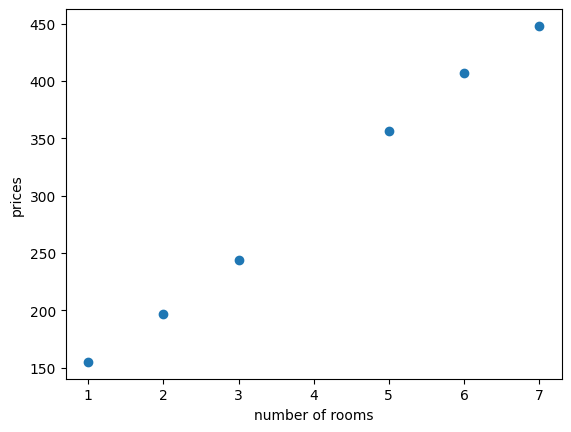

In [2]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])
utils.plot_points(features, labels)

In [3]:
def simple_trick(slope, intercept, x, y):
    """
    Функция реализует самый простой алгоритм поиска прямой линии проходящей через точки на плоскости. 
    Входные данные: 
        - точка с координатами (x, y)
        - уравнение прямой линии y = mx * b 
    Результат: прямая линия y` = m`x + b`, которая находится максимально близко к точке
    Процедура: 
        - выбираем два очень маленьких случайных числа n1 b n2
        - Сценарий 1. Если точка находится над прямой и слева от оси Y, то вращаем прямую по часовой стрелке, перемещаем вверх:
            - Вычитаем n1 из наклона m, получаем m` = m - n1
            - Добавляем n2 к y-пересечению b, получаем b` = b + n2. 
        - Сценарий 2. Если точка находится над прямой и справа от оси Y, то вращаем прямую против часовой стрелки, перемещаем вверх:
            - Добавляем n1 к наклону m, получаем m` = m + n1
            - Добавляем n2 к y-пересечению b, получаем b` = b + n2.
        - Сценарий 3. Если точка находится под прямой и слева от оси Y, то вращаем прямую против часовой стрелки, перемещаем вниз:
            - Добавляем n1 к наклону m, получаем m` = m + n1
            - Вычитаем n2 из y-пересечения b, получаем b` = b - n2.
        - Сценарий 4. Если точка находится под прямой и справа от оси Y, то вращаем прямую по часовой стрелке, перемещаем вниз:
            - Вычитаем n1 из наклона m, получаем m` = m - n1
            - Вычитаем n2 из y-пересечения b, получаем b` = b - n2.
    
    
    :param slope: 
    :param intercept: 
    :param x: 
    :param y: 
    :return: 
    """
    
    slope_small_random = random.random() * 0.1
    intercept_small_random = random.random() * 0.1
    y_predict = slope * x + intercept  # y = mx * b 

    # Вращаем прямую по часовой стрелке, перемещаем вверх 
    if y > y_predict and x < 0:
        slope -= slope_small_random
        intercept += intercept_small_random

    # Вращаем прямую против часовой стрелки, перемещаем вверх
    if y > y_predict and x > 0:
        slope += slope_small_random
        intercept += intercept_small_random

    # Вращаем по часовой стрелке, перемещаем вниз
    if y < y_predict and x < 0:
        slope += slope_small_random   
        intercept -= intercept_small_random  

    # Вращаем по часовой стрелке, перемещаем вниз
    if y < y_predict and x > 0:
        slope -= slope_small_random
        intercept -= intercept_small_random

    return slope, intercept

Price per room: 51.35095095029784
Base price: 50.792342509934706


(51.35095095029784, 50.792342509934706)

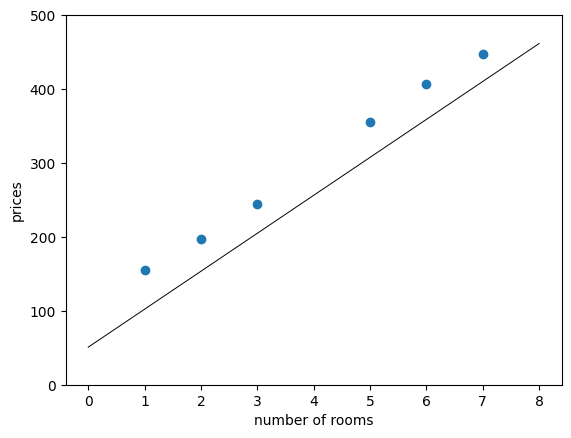

In [9]:
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        # if epoch == 1:
        # if epoch <= 10:
        # if epoch <= 50:
        # if epoch > 50:
        # if True:
        #     utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        # i = random.randint(0, len(features) - 1)
        num_rooms = features[2]
        price = labels[2]
        price_per_room, base_price = simple_trick(price_per_room, base_price, num_rooms, price)
        # price_per_room, base_price = absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate)
        # price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price


# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate=0.01, epochs=1000)